In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [58]:
df = pd.read_csv('winequality-red.csv')

In [59]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [60]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [61]:
# there are no categorical variables. each feature is a number. Regression problem. 
# Given the set of values for features, we have to predict the quality of wine.
# finding correlation of each feature with our target variable - quality
correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


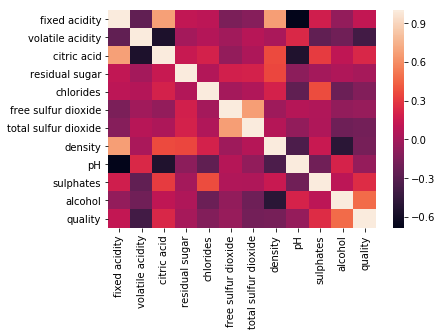

In [62]:
sns.heatmap(df.corr())
plt.show()

In [63]:
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [64]:
# taking features with correlation more than 0.05 as input x and quality as target variable y
features = get_features(0.05)
print(features)
x = df[features]
y = df['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [65]:
x

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
5,7.4,0.660,0.00,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
6,7.9,0.600,0.06,0.069,15.0,59.0,0.99640,3.30,0.46,9.4
7,7.3,0.650,0.00,0.065,15.0,21.0,0.99460,3.39,0.47,10.0
8,7.8,0.580,0.02,0.073,9.0,18.0,0.99680,3.36,0.57,9.5
9,7.5,0.500,0.36,0.071,17.0,102.0,0.99780,3.35,0.80,10.5


In [66]:
y

0       5
1       5
2       5
3       6
4       5
5       5
6       5
7       7
8       7
9       5
10      5
11      5
12      5
13      5
14      5
15      5
16      7
17      5
18      4
19      6
20      6
21      5
22      5
23      5
24      6
25      5
26      5
27      5
28      5
29      6
       ..
1569    6
1570    6
1571    6
1572    5
1573    6
1574    6
1575    6
1576    6
1577    6
1578    6
1579    5
1580    6
1581    5
1582    5
1583    5
1584    7
1585    6
1586    6
1587    6
1588    6
1589    5
1590    6
1591    6
1592    6
1593    6
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

In [68]:
# x_train.shape
# x_test.shape
# y_train.shape
y_test.shape

(400,)

In [69]:
# fitting linear regression to training data
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
# this gives the coefficients of the 10 features selected above. 
regressor.coef_

array([ 0.01773723, -0.99256049, -0.13962865, -1.59094279,  0.00559652,
       -0.00351973,  0.76859036, -0.43741414,  0.81288805,  0.30148385])

In [71]:
train_pred = regressor.predict(x_train)
train_pred

array([ 5.33777144,  5.33826411,  5.9503318 , ...,  6.3903182 ,
        6.19979375,  5.27597259])

In [72]:
test_pred = regressor.predict(x_test)
test_pred

array([ 5.10801475,  5.65933623,  5.90407267,  6.13461179,  5.00611866,
        5.44514691,  5.05735245,  6.15497513,  5.51919603,  5.77259374,
        5.61809366,  5.23616173,  5.23544213,  5.31968644,  6.47007277,
        5.043404  ,  5.85287121,  5.19427909,  6.07727089,  6.34949018,
        6.42525555,  5.51221957,  5.8030796 ,  4.93637817,  5.16618356,
        5.48255293,  5.13758624,  6.60000969,  5.88754763,  5.74133915,
        6.09716961,  6.29379754,  4.91269821,  5.88611904,  5.11007273,
        5.94574773,  6.80685536,  5.04305653,  5.25438683,  5.88611904,
        5.17406542,  4.84008442,  6.48781656,  5.40521715,  5.31105571,
        5.84484462,  5.7100681 ,  5.24300809,  5.25021217,  5.46398911,
        5.08740494,  5.61369555,  6.01375792,  6.32497377,  5.47511954,
        5.36466869,  5.09234555,  4.92625623,  5.21415941,  5.08274744,
        4.79570013,  5.4377645 ,  5.25237771,  5.68830391,  5.85145609,
        6.52420079,  5.38691412,  5.71775637,  5.17641417,  5.99

In [73]:
train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
train_rmse

0.65252409959470536

In [74]:
test_rmse = mean_squared_error(test_pred, y_test) ** 0.5
test_rmse

0.62753815392309809

In [75]:
# The root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample and population values) predicted by a model and the values actually observed. 
# The RMSE for your training and your test sets should be very similar if you have built a good model. 
# If the RMSE for the test set is much higher than that of the training set, it is likely that you've badly over fit the data

In [76]:
# rounding off the predicted values for test set
predicted_data = np.round_(test_pred)
predicted_data

array([ 5.,  6.,  6.,  6.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,  5.,  5.,
        5.,  6.,  5.,  6.,  5.,  6.,  6.,  6.,  6.,  6.,  5.,  5.,  5.,
        5.,  7.,  6.,  6.,  6.,  6.,  5.,  6.,  5.,  6.,  7.,  5.,  5.,
        6.,  5.,  5.,  6.,  5.,  5.,  6.,  6.,  5.,  5.,  5.,  5.,  6.,
        6.,  6.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,  6.,
        7.,  5.,  6.,  5.,  6.,  6.,  6.,  6.,  5.,  6.,  6.,  5.,  6.,
        6.,  6.,  6.,  5.,  5.,  6.,  6.,  5.,  5.,  6.,  6.,  6.,  6.,
        6.,  6.,  5.,  5.,  5.,  5.,  5.,  5.,  7.,  6.,  6.,  6.,  6.,
        6.,  5.,  5.,  5.,  5.,  6.,  6.,  5.,  6.,  6.,  5.,  5.,  5.,
        5.,  6.,  6.,  6.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,  5.,  5.,
        5.,  5.,  6.,  6.,  7.,  6.,  6.,  6.,  5.,  5.,  6.,  7.,  5.,
        5.,  6.,  5.,  6.,  6.,  7.,  5.,  5.,  5.,  6.,  5.,  5.,  6.,
        6.,  5.,  5.,  6.,  6.,  6.,  6.,  6.,  6.,  5.,  6.,  5.,  5.,
        6.,  6.,  7.,  5.,  6.,  6.,  5.,  6.,  6.,  5.,  6.,  7

In [77]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

Mean Absolute Error: 0.484434075598
Mean Squared Error: 0.393804134629
Root Mean Squared Error: 0.627538153923


In [78]:
coeffecients = pd.DataFrame(regressor.coef_,features)
coeffecients.columns = ['Coeffecient']
coeffecients
#These numbers mean that holding all other features fixed, a 1 unit increase in suplhates will lead to an increase of 0.8 in Quality of wine, and similarly for the other features
#These numbers mean that holding all other features fixed, a 1 unit increase in volatile acidity will lead to a decrease of 0.99 in Quality of wine, and similarly for the other features

,Coeffecient
fixed acidity,0.017737
volatile acidity,-0.992560
citric acid,-0.139629
chlorides,-1.590943
free sulfur dioxide,0.005597
total sulfur dioxide,-0.003520
density,0.768590
pH,-0.437414
sulphates,0.812888
alcohol,0.301484
